<a href="https://colab.research.google.com/github/SAIFIANS/DS_Code/blob/main/DS_Random_Var_%26Prob_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There are two types of events -

Random Variable,         Deterministic Variable

Deterministic Var - is Constant or fixed

Random Var - Takes more than one values

In [41]:
#import libraries
import pandas as pd
import numpy as np
from scipy import stats

Probability Distributions can be done on Random Variables

Binomial Distribution Rules -

- Exp. should consists of n trials
- Each trial can reasult in just two possible outcomes
- The prob. of sucess if denoted by P, is same for every trial
- The trials are independent that is the outcome on one trial does not affect the outcome on another trial


In [ ]:
# Binomial Dist. is for Discrete Random Var.
# Normal Dist. is for Cont. Random Var.

Normal Distribution Properties
- Every Normal Dist. has its own mean and Std. Dev.
- Its shape of the normal dist. is symmetric around the mean.
- The mean, median and mode are equal
- The area under the curve is 1.
- Normal Dist. are denser in the center and less in the tails.
- Since the normal dist. is mould shape, it follows the empirical rule i.e. -
  - 68% of the data are within 1 Std. Dev. of mean
  - 95% of the data are within 2 Std. Dev. of mean
  - 99.7% of the data are within 3 Std. Dev. of mean

#Probability Distributions and Confidence Interval-1current
#19:59:00


Z-scores or Standardization of data.

z-score makes use of the mean and the Std. Dev. of the data set in order to specify the relative location of a measurement.
It represents the distance b/w a given data point and the mean, expressed in Std. Dev. The score is also known as "Standardizing" the data point

Z = (xi-mue)/sigma

#Probability Calculation for cont. Dist. -

The prob. associated with any single value of the random var. is always 0.

To calc. Cont. Prob. Use -

from scipy import stats

stats.norm.cdf(x,loc=mean,scale=std)

In [ ]:
from scipy import stats
stats.norm.cdf(70,loc=60,scale=10)


0.8413447460685429

In [ ]:
stats.norm.cdf(680,711,29)

0.14254260383881612

In [ ]:
1-(stats.norm.cdf(720,711,29))

0.37814937265194704

In [ ]:
(stats.norm.cdf(740,711,29))-(stats.norm.cdf(680,711,29))

0.6988021422297268

In [7]:
import pandas as pd
beml_df =pd.read_csv("/content/BEML.csv")
glaxo_df=pd.read_csv("/content/GLAXO.csv")

In [ ]:
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

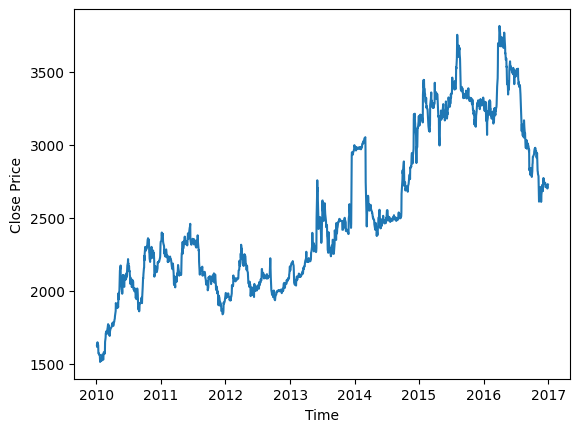

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(glaxo_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

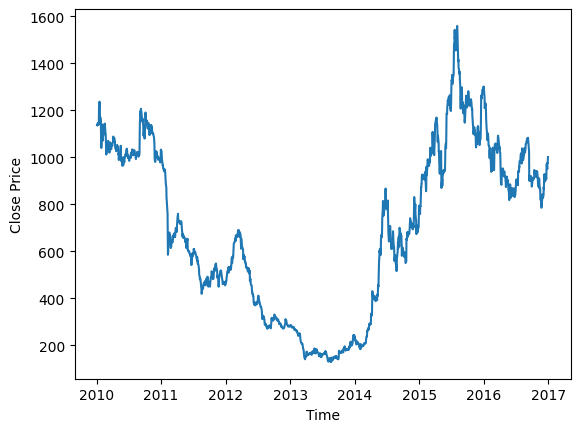

In [ ]:
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

In [ ]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods =1)
beml_df['gain'] = beml_df.Close.pct_change(periods =1)

In [ ]:
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

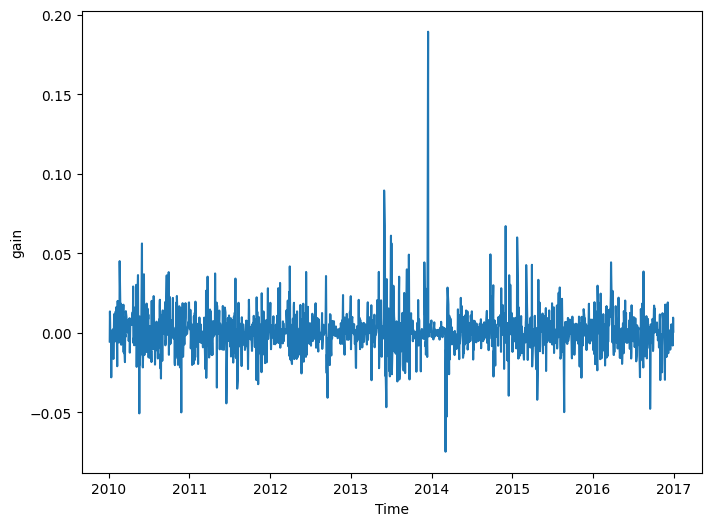

In [ ]:
plt.figure(figsize = (8, 6));
plt.plot(glaxo_df.index, glaxo_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');

<ipython-input-18-58b25c2e9214>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(glaxo_df.gain, label = 'Glaxo');


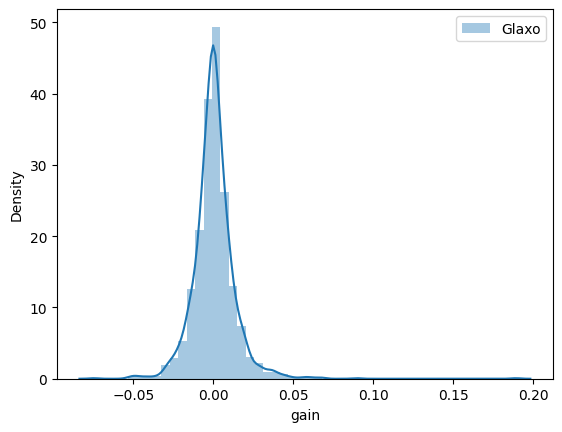

In [ ]:
sns.distplot(glaxo_df.gain, label = 'Glaxo');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

In [ ]:
#prob. of making 2% loss or higher in Glaxo
stats.norm.cdf(-0.02,
               loc=glaxo_df.gain.mean(),
               scale=glaxo_df.gain.std())

0.06352488667177401

In [ ]:
#prob. of making 2% gain or higher in Glaxo
1- stats.norm.cdf(0.02,
               loc=glaxo_df.gain.mean(),
               scale=glaxo_df.gain.std())

0.07104511457618568

In [ ]:
#prob. of making 2% loss or higher in beml
stats.norm.cdf(-0.02,
               loc=beml_df.gain.mean(),
               scale=beml_df.gain.std())

0.22155987503755292

In [ ]:
#prob. of making 2% gain or higher in beml
1-stats.norm.cdf(0.02,
               loc=beml_df.gain.mean(),
               scale=beml_df.gain.std())

0.22769829484075355

In [ ]:
#Probability Distributions and Confidence Interval-1
##Until 02:44:00

Inferntial Statistics

# Central Limit Theorem (CLT)
The distribution of the sample mean -
- will be normal when the distribution of data in the population is normal
- will be appox. normal even if the distribution of the data in the 
population is not normal, if the population is fairly large


#Confidence Interval (CI)



In [1]:
1990+1.645*211.29

2337.5720499999998

In [3]:
1990-1.645*211.29

1642.42795

In [5]:
# Z distribution

from scipy import stats
stats.norm.ppf(.90)

1.2815515655446004

#Confidence interval, Hypothesis Testing

In [5]:
# T distribution

from scipy import stats

stats.t.ppf(0.975,df=139)

1.977177724476122

In [16]:
glaxo_df =pd.read_csv('/content/glaxo_df.csv')
beml_df =pd.read_csv("/content/beml_df.csv")

In [18]:
import numpy as np
glaxo_df_ci = stats.norm.interval(0.95,
loc=glaxo_df.gain.mean(),
scale =glaxo_df.gain.std())
print("Gain at 95% confidence interval is :",np.round(glaxo_df_ci,4))


Gain at 95% confidence interval is : [-0.0258  0.0266]


##Hypothesis Testing
Hypothesis Testing is a statistical method that is used in making statistical decisions using experimental data. Hypothesis testing is basically an assumption that we make abou the population parameter.

1. Define Hypothesis
        H0 : Null Hypothesis  H0 : mue <=120/s/w

        Ha : Alternate Hypothesis Ha : mue >120/s/w
2. Select test (z/t)
###a.k.a Critical Value
- we choose z-test when pop. std. is given
- total no. of data points are >=30
- formula for calculating z test (xbar-mue)/lambda/underscore(n)

- we choose t-test when pop. std is not given
- formula for t-test 
(xbar-mue)/s/undescore(n)

3. Get the alpha value (default 0.05)

4. Compute p-value for t-value -
stats.t.cdf(t,df)
5. Compare p-value with alpha value

if p<alpha reject H0

if p>alpha fail to reject H0


In [20]:
stats.t.cdf(2.2,79)

0.9846354922292375

###Normal Distribution
stats.norm.cdf(z/t,loc=0,scale=0) this is used for Hypothesis Testing and calc. the area


stats.norm.ppf(Confidence Level,loc=0,scale=0) this is used for Confidence Interval

 ### t-distribution codes
 
 stats.t.cdf(t-value,df)

 stats.t.ppf(Confidence Level,df)

In [ ]:
# Until 1:30:50

###Variants to Hypothesis T-test



In [31]:
import numpy as np
(4-7.2)/(3/np.sqrt(50))


-7.542472332656508

In [33]:
2*stats.t.cdf(-7.54,df=49)

9.710838698240386e-10

In [38]:
import pandas as pd
from scipy import stats
Data =pd.Series([0.593,0.142,0.329,0.691,0.231,0.793,0.519,0.392,0.418])
#this gives two tail t-value
p= scipy.stats.ttest_1samp(Data,0.3)[1]
p_value = p/2

In [40]:
p_value

0.029265164842448826

In [43]:
Control=pd.Series([91,87,99,77,88,91])
Treat =pd.Series([101,110,103,93,99,104])

In [44]:
#for 2sample 2tail t-test
stats.ttest_ind(Control,Treat)

Ttest_indResult(statistic=-3.4456126735364876, pvalue=0.006272124350809803)

###Proportion Test

In [45]:
n1 =247
p1 =.37

n2=308
p2= .39

In [46]:
population1 =np.random.binomial(1,p1,n1)
population2 =np.random.binomial(1,p2,n2)

In [47]:
import statsmodels.api as sm
sm.stats.ttest_ind(population1,population2)

(-0.19822752332850269, 0.8429399032294317, 553.0)